In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Personal note: the following path is for the data being stored in the same
# dir as the sample_data dir. colab refreshes and sometimes gets rid of this
# so just need to reupload whenever it gets removed. Looking for a fix to this
# Yining: When I run the code, the file cannot be traced, so I reuploaded to the following dir. 
# It may vanish again.
xlpath = "/content/sample_data/proshares_analysis_data.xlsx"
# Had to add this real quick to hotfix some problems with the maxDrawdown
hf = pd.read_excel(xlpath,'hedge_fund_series').set_index('date')

dataDesc = pd.read_excel(xlpath, sheet_name = "descriptions")
hedge_fund_series = pd.read_excel(xlpath, sheet_name = "hedge_fund_series")
merrill_factors = pd.read_excel(xlpath, sheet_name = "merrill_factors")
other_data = pd.read_excel(xlpath, sheet_name = "other_data")

print("Below we have a description of all the assets:")
display(dataDesc)

print("This is the total returns on the aforementioned assets within hedge fund series:")
display(hedge_fund_series)

print("performance of assets in merrill factors:")
display(merrill_factors)


Below we have a description of all the assets:


,Unnamed: 0,Descriptions
0,MLEIFCTR Index,ML Factor Model
1,EFA US Equity,ISHARES MSCI EAFE ETF
2,HFRIFWI Index,Hedge Fund Research HFRI Fund
3,HDG US Equity,PROSHARES HEDGE REPLICAT ETF
4,UPRO US Equity,PROSHARES ULTRAPRO S&P 500
5,TRVCI Index,Refinitiv VC Index
6,USGG3M Index,US Generic Govt 3 Mth
7,SPY US Equity,SPDR S&P 500 ETF TRUST
8,EEM US Equity,ISHARES MSCI EMERGING MARKET
9,EUO US Equity,PROSHARES ULTRASHORT EURO


This is the total returns on the aforementioned assets within hedge fund series:


,date,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
0,2011-08-31,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491
1,2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
2,2011-10-31,0.026858,0.043593,0.043320,0.050532,0.025241
3,2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
4,2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001854
...,...,...,...,...,...,...
117,2021-05-31,0.013401,0.000701,0.000666,-0.000784,0.005940
118,2021-06-30,0.005424,0.005985,0.005991,0.001052,0.002485
119,2021-07-31,-0.009095,-0.013890,-0.013766,-0.012520,-0.003409
120,2021-08-31,0.007628,0.009262,0.009286,0.007066,0.001245


performance of assets in merrill factors:


,date,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
0,2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
1,2011-09-30,-0.069449,0.000017,-0.179064,-0.108083,0.142180,-0.111541
2,2011-10-31,0.109147,-0.000013,0.162986,0.096275,-0.069502,0.151012
3,2011-11-30,-0.004064,0.000000,-0.019723,-0.021764,0.054627,-0.003783
4,2011-12-31,0.010440,0.000009,-0.043017,-0.022139,0.075581,0.005114
...,...,...,...,...,...,...,...
117,2021-05-31,0.006566,0.000002,0.016487,0.034823,-0.027167,0.002712
118,2021-06-30,0.022473,0.000034,0.009467,-0.010819,0.055851,0.018702
119,2021-07-31,0.024412,0.000034,-0.064370,0.007734,-0.001679,-0.036273
120,2021-08-31,0.029760,0.000030,0.015698,0.014467,0.009672,0.022031


#2.1) Summary Statistics hedge_fund_series


In [ ]:
print("a)")
print("Below is a table of the annualized mean excess returns of each of the assets:")
display(hedge_fund_series.mean(numeric_only = True)*12)
print("b)")
print("\nSimilarly, below is a table of the annualized volatility of the excess returns:")
display(hedge_fund_series.std(numeric_only = True)*np.sqrt(12))

dataSharpeRatio = np.sqrt(12) * (hedge_fund_series.mean(numeric_only = True) / hedge_fund_series.std(numeric_only = True))
maxSharpe = dataSharpeRatio.idxmax()
minSharpe = dataSharpeRatio.idxmin()
print("c)")
print("\nBelow is a sorted table of all the Sharpe Ratios")
print("————————————————————————————————————————————————")
display(dataSharpeRatio.sort_values(axis=0, ascending=False))
print("————————————————————————————————————————————————")
print ("The asset with highest Sharpe ratio is " + maxSharpe, ":", dataSharpeRatio.max())
print ("The asset with lowest Sharpe ratio is " + minSharpe, ":", dataSharpeRatio.min())

a)
Below is a table of the annualized mean excess returns of each of the assets:


HFRIFWI Index     0.050784
MLEIFCTR Index    0.038821
MLEIFCTX Index    0.037330
HDG US Equity     0.028100
QAI US Equity     0.025491
dtype: float64

b)

Similarly, below is a table of the annualized volatility of the excess returns:


HFRIFWI Index     0.061507
MLEIFCTR Index    0.053848
MLEIFCTX Index    0.053682
HDG US Equity     0.056380
QAI US Equity     0.045484
dtype: float64

c)

Below is a sorted table of all the Sharpe Ratios
————————————————————————————————————————————————


HFRIFWI Index     0.825665
MLEIFCTR Index    0.720933
MLEIFCTX Index    0.695382
QAI US Equity     0.560434
HDG US Equity     0.498407
dtype: float64

————————————————————————————————————————————————
The asset with highest Sharpe ratio is HFRIFWI Index : 0.8256646861719121
The asset with lowest Sharpe ratio is HDG US Equity : 0.49840735477975323


# 2.2) Tail-risk Statistics 

In [ ]:
# calculate tail-risk statistics 
ticker = hedge_fund_series.columns[1:]
skewness_hedge = hedge_fund_series.skew()
kurtosis_hedge = hedge_fund_series.kurtosis()
col = hedge_fund_series.iloc[:,1:]
VaR_hedge = np.array(col.quantile(0.05))
df_mask= col <= col.quantile(0.05)
CVaR = col[df_mask].mean(numeric_only = True)
kurtosis_hedge_differ3 = kurtosis_hedge - 3

tail_risk_statistics = pd.DataFrame([ticker, skewness_hedge, kurtosis_hedge, VaR_hedge, np.array(CVaR), kurtosis_hedge_differ3], index=['Ticker', 'skweness', 'kurtosis', 'Value at Risk','Conditional Value at Risk', "Kurtosis Difference by 3"])
print("a), b), c), d)")
print("Below is a table of tail-risk statistics of the assets:")
display(tail_risk_statistics) 
print("———————————————————————————————————————————————————————")
# not quite sure what max recovery is... Im guessing largest upswing would love to discuss with you guys though 

# Below is a function for maximum drawdown, taken from the TA review
#Maximum Drawdown
def maximumDrawdown(returns):
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.cummax()
    drawdown = (cum_returns - rolling_max) / rolling_max

    max_drawdown = drawdown.min()
    end_date = drawdown.idxmin()
    summary = pd.DataFrame({'Max Drawdown': max_drawdown, 'Bottom': end_date})

    for col in drawdown:
        summary.loc[col,'Peak'] = (rolling_max.loc[:end_date[col],col]).idxmax()
        recovery = (drawdown.loc[end_date[col]:,col])
        try:
            summary.loc[col,'Recover'] = pd.to_datetime(recovery[recovery >= 0].index[0])
        except:
            summary.loc[col,'Recover'] = pd.to_datetime(None)

        summary['Peak'] = pd.to_datetime(summary['Peak'])
        try:
            summary['Duration (to Recover)'] = (summary['Recover'] - summary['Peak'])
        except:
            summary['Duration (to Recover)'] = None
            
        summary = summary[['Max Drawdown','Peak','Bottom','Recover','Duration (to Recover)']]

    return summary  

hedge_fund_drawdown = maximumDrawdown(hf)
print("e)")
print("Below is a table of information related to the maxmimum drawdown:")
display(hedge_fund_drawdown)




a), b), c), d)
Below is a table of tail-risk statistics of the assets:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,0,1,2,3,4
Ticker,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
skweness,-1.109248,-0.186692,-0.171632,-0.179641,-0.545085
kurtosis,6.730109,2.429484,2.375597,2.581654,2.669553
Value at Risk,-0.025311,-0.025527,-0.025629,-0.028529,-0.016172
Conditional Value at Risk,-0.038757,-0.032779,-0.032724,-0.034782,-0.026348
Kurtosis Difference by 3,3.730109,-0.570516,-0.624403,-0.418346,-0.330447


———————————————————————————————————————————————————————
e)
Below is a table of information related to the maxmimum drawdown:


,Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-0.115473,2019-12-31,2020-03-31,2020-08-31,244 days
MLEIFCTR Index,-0.084500,2019-12-31,2020-03-31,2020-11-30,335 days
MLEIFCTX Index,-0.083673,2019-12-31,2020-03-31,2020-11-30,335 days
HDG US Equity,-0.088245,2020-01-31,2020-03-31,2020-11-30,304 days
QAI US Equity,-0.075649,2019-12-31,2020-03-31,2020-07-31,213 days


# 2.3) Regressing against SPY 

In [ ]:
rets = hedge_fund_series.mean(numeric_only = True)*12
vol = hedge_fund_series.std(numeric_only = True)*np.sqrt(12)
results = []

for i in range(len(ticker)):
  y = np.array(hedge_fund_series.iloc[:,1+i])
  x = np.array(merrill_factors.iloc[:,1]).reshape((-1, 1))
  reg = LinearRegression().fit(x, y)

  # elements for ticker i 
  beta = reg.coef_
  treynor_ratio = rets[i]/reg.coef_
  IR = vol[i]/reg.intercept_
  stats = [beta, treynor_ratio, IR]
  results.append(stats)

reg_stats = pd.DataFrame([['Beta', 'Treynor Measure', 'IR'], results[0], results[1], results[2], results[3],  results[4]], index = ['ticker', ticker[0], ticker[1], ticker[2], ticker[3], ticker[4]])
print("a), b), c)")
display(reg_stats)

a), b), c)


,0,1,2
ticker,Beta,Treynor Measure,IR
HFRIFWI Index,[0.3943202440271528],[0.1287892690847076],-99.782085
MLEIFCTR Index,[0.35938232134652526],[0.1080207861123277],-45.488002
MLEIFCTX Index,[0.35803354156047007],[0.10426331609283797],-41.567577
HDG US Equity,[0.3691986751238127],[0.07611084811016232],-25.651864
QAI US Equity,[0.2849928131066541],[0.08944269176267504],-32.959877


# 2.4) Relative Performance 

####a)
One thing that we can note is that the IR for each in our series is a negative value. Because IR is defined as α/σ_ϵ , and σ_ϵ >= 0, we know that α must be negative for each. 

We have our .28 < β < .40, so the covariance cov(x,y) where x is the index and y is the SPY must be very similar for each, as we are regressing against SPY for each so the denominator of our β is var(SPY) for each. This hints at each index having a high correlation with the SPY, and because they are all correlated to the same thing we expect them to be highly correlated to each other. This is confirmed in 2.5.


####b)
The performance of the HDG and the QAI are fairly comparable.
The Beta of the HDG was higher, but had a lower Treynor Ratio. They also had fairly similar Information Ratios, with QAI having a slightly lower one.
####c)


In [ ]:
y = hedge_fund_series["HFRIFWI Index"]
x = hedge_fund_series[["MLEIFCTR Index","MLEIFCTX Index","HDG US Equity"]]
rs = sm.OLS(y,x).fit().rsquared
print("r-sqaured of regression is:")
print(rs)
print("As the r-squared is relatively high, HDG and the ML series capture the most notable properties of HFRI")

r-sqaured of regression is:
0.8380062246682771
As the r-squared is relatively high, HDG and the ML series capture the most notable properties of HFRI


# 2.5) Correlation Matrix 

a)
Below is the correlation matrix of the excess returns:


,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
HFRIFWI Index,1.000000,0.910392,0.910063,0.897653,0.866714
MLEIFCTR Index,0.910392,1.000000,0.999939,0.984621,0.864431
MLEIFCTX Index,0.910063,0.999939,1.000000,0.984471,0.863734
HDG US Equity,0.897653,0.984621,0.984471,1.000000,0.847597
QAI US Equity,0.866714,0.864431,0.863734,0.847597,1.000000


Below is the heatmap of the correlation matrix of the excess returns:
b)
The asset pair with highest correlation: 


('MLEIFCTX Index', 'MLEIFCTR Index')

The asset pair with lowest correlation: 


('QAI US Equity', 'HDG US Equity')

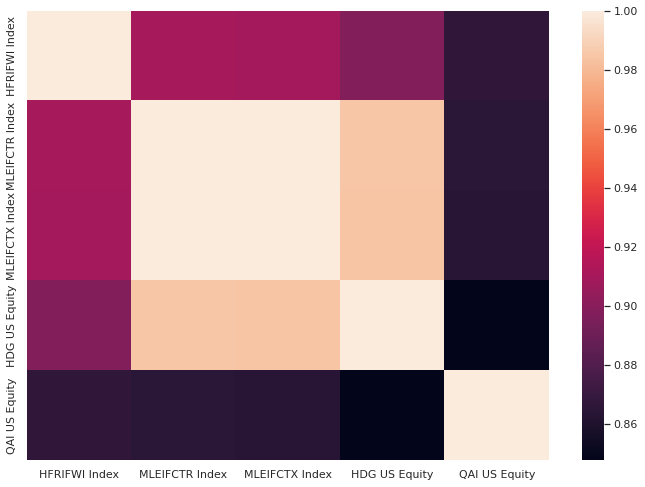

In [ ]:
hedge_fund_corr = hedge_fund_series.corr()
print("a)")
print("Below is the correlation matrix of the excess returns:")
display(hedge_fund_corr)

print("Below is the heatmap of the correlation matrix of the excess returns:")
# setting figure size 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hedge_fund_corr)

print("b)")
# determining the magnitude of the correlations 
Pairs = hedge_fund_corr.abs().unstack().sort_values().drop_duplicates()
SortedCorrPairs = Pairs.iloc[:-1]

# for some reason there are blanks next to SPY sometimes ????
# print ("Asset pair correlations: ")
# display(SortedCorrPairs)

maxCorr = SortedCorrPairs.idxmax()
minCorr = SortedCorrPairs.idxmin()
print ("The asset pair with highest correlation: ")
display(maxCorr)

print ("The asset pair with lowest correlation: ")
display(minCorr)

# 2.6) Replicating HFRI

In [ ]:
x = merrill_factors.iloc[:,1:]
x = sm.add_constant(x)
y = hedge_fund_series["HFRIFWI Index"]
result = sm.OLS(y,x).fit()
display(result.summary())

residual = result.resid
print("\n")
print("a)")
alpha = result.params[0]
print("Constant Alpha: ")
print(alpha)
for i in range(5):
  print("beta " +str(i+1)+": ")
  print(result.params[i+1])
rs = result.rsquared

print("b)")
print("The only one that seems to require huge short positions is beta 2, corresponding to USGG3M")

print("c)")
print("r-square: \n"+str(rs))

print("d)")
print("volatility:")
display (residual.std())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HFRIFWI Index   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     113.7
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           5.84e-46
Time:                        17:00:19   Log-Likelihood:                 437.27
No. Observations:                 122   AIC:                            -860.5
Df Residuals:                     115   BIC:                            -840.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.001      1.387      0.168      -0.000       0.003
SPY US Equity     0.0720      0.042      1.725      0.087      -0.011       0.155
USGG3M Index     -0.4006      0.953     -0.420      0.675      -2.289       1.488
EEM US Equity     0.0722      0.023      3.083      0.003       0.026       0.119
EFA US Equity     0.1063      0.038      2.768      0.007       0.030       0.182
EUO US Equity     0.0224      0.018      1.245      0.216      -0.013       0.058
IWM US Equity     0.1309      0.025      5.139      0.000       0.080       0.181
==============================================================================
Omnibus:                       25.081   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.558
Skew:                          -0.600   Prob(JB):                     1.31e-20
Kurtosis:                       7.071   Cond. No.                     1.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



a)
Constant Alpha: 
0.0011466986715095526
beta 1: 
0.07202236838223727
beta 2: 
-0.4005914103376802
beta 3: 
0.07215920207596555
beta 4: 
0.1063180691691278
beta 5: 
0.02243061375523874
b)
The only one that seems to require huge short positions is beta 2, corresponding to USGG3M
c)
r-square: 
0.8556947723602492
d)
volatility:


0.00674489900815526